# Data collection with Python

## Nested Data 

In [2]:
#list
nested_list = [['a', 'b', 'c'],['d', 'e'],['f', 'g', 'h']]  
for l in nested_list:
    print(l)

['a', 'b', 'c']
['d', 'e']
['f', 'g', 'h']


In [9]:
# dictionary
info = {'personal_data':
         {'name': 'Lauren',
          'age': 20,
          'major': 'Information Science',
          'physical_features':
             {'color': {'eye': 'blue',
                        'hair': 'brown'},
              'height': "5'8"}
         },
       'other':
         {'favorite_colors': ['purple', 'green', 'blue'],
          'interested_in': ['social media', 'intellectual property', 'copyright', 'music', 'books']
         }
      }
info['personal_data']['physical_features']['color']

{'eye': 'blue', 'hair': 'brown'}

JSON stands for JavaScript Object Notation. It looks a lot like the representation of nested dictionaries and lists in python when we write them out as literals in a program, but with a few small differences (e.g., the word null instead of None). When your program receives a JSON-formatted string, generally you will want to convert it into a python object, a list or a dictionary.

**json.loads()** takes a string as input and produces a python object (a dictionary or a list) as output.

**json.dumps()** does the inverse of loads. It takes a python object (a dictionary or a list) and returns a string in JSON format.

In [12]:
import json
a_string = '\n\n\n{\n "resultCount":25,\n "results": [\n{"wrapperType":"track", "kind":"podcast", "collectionId":10892}]}'
print(a_string)
d = json.loads(a_string)
print("------")
print(type(d))   #'dict'
print(d.keys())
print(d['resultCount'])




{
 "resultCount":25,
 "results": [
{"wrapperType":"track", "kind":"podcast", "collectionId":10892}]}
------
<class 'dict'>
dict_keys(['resultCount', 'results'])
25


In [13]:
def pretty(obj):
    return json.dumps(obj, sort_keys=True, indent=2)

d = {'key1': {'c': True, 'a': 90, '5': 50}, 'key2':{'b': 3, 'c': "yes"}}

print(d)
print('--------')
print(pretty(d))

{'key1': {'c': True, 'a': 90, '5': 50}, 'key2': {'b': 3, 'c': 'yes'}}
--------
{
  "key1": {
    "5": 50,
    "a": 90,
    "c": true
  },
  "key2": {
    "b": 3,
    "c": "yes"
  }
}


## Nested Iteration

In [14]:
nested1 = [['a', 'b', 'c'],['d', 'e'],['f', 'g', 'h']]
for x in nested1:
    print("level1: ")
    for y in x:
        print("     level2: " + y)


level1: 
     level2: a
     level2: b
     level2: c
level1: 
     level2: d
     level2: e
level1: 
     level2: f
     level2: g
     level2: h


In [15]:
nested2 = [1, 2, ['a', 'b', 'c'],['d', 'e'],['f', 'g', 'h']]
for x in nested2:
    print("level1: ")
    if type(x) is list:
        for y in x:
            print("     level2: {}".format(y))
    else:
        print(x)


level1: 
1
level1: 
2
level1: 
     level2: a
     level2: b
     level2: c
level1: 
     level2: d
     level2: e
level1: 
     level2: f
     level2: g
     level2: h


## Deep and Shallow Copies

When you copy a nested list, you do not also get copies of the internal lists. This means that if you perform a mutation operation on one of the original sublists, the copied version will also change. We can see this happen in the following nested list, which only has two levels.

In [16]:
original = [['dogs', 'puppies'], ['cats', "kittens"]]
copied_version = original[:]
print(copied_version)
print(copied_version is original)
print(copied_version == original)  #False
original[0].append(["canines"])
print(original)
print("-------- Now look at the copied version -----------")
print(copied_version)


[['dogs', 'puppies'], ['cats', 'kittens']]
False
True
[['dogs', 'puppies', ['canines']], ['cats', 'kittens']]
-------- Now look at the copied version -----------
[['dogs', 'puppies', ['canines']], ['cats', 'kittens']]


Assuming that you don’t want to have aliased lists inside of your nested list, then you’ll need to perform nested iteration. 

Or equivalently, you could take advantage of the slice operator to do the copying of the inner list.

In [17]:
original = [['dogs', 'puppies'], ['cats', "kittens"]]
copied_outer_list = []
for inner_list in original:
    copied_inner_list = []
    for item in inner_list:
        copied_inner_list.append(item)
    copied_outer_list.append(copied_inner_list)
print(copied_outer_list)
original[0].append(["canines"])
print(original)
print("-------- Now look at the copied version -----------")
print(copied_outer_list)


[['dogs', 'puppies'], ['cats', 'kittens']]
[['dogs', 'puppies', ['canines']], ['cats', 'kittens']]
-------- Now look at the copied version -----------
[['dogs', 'puppies'], ['cats', 'kittens']]


In [18]:
original = [['dogs', 'puppies'], ['cats', "kittens"]]
copied_outer_list = []
for inner_list in original:
    copied_inner_list = inner_list[:]
    copied_outer_list.append(copied_inner_list)
print(copied_outer_list)
original[0].append(["canines"])
print(original)
print("-------- Now look at the copied version -----------")
print(copied_outer_list)


[['dogs', 'puppies'], ['cats', 'kittens']]
[['dogs', 'puppies', ['canines']], ['cats', 'kittens']]
-------- Now look at the copied version -----------
[['dogs', 'puppies'], ['cats', 'kittens']]


This process above works fine when there are only two layers or levels in a nested list. However, if we want to make a copy of a nested list that has more than two levels, then we recommend using the copy module. In the **copy** module there is a method called deepcopy that will take care of the operation for you.

In [19]:
import copy
original = [['canines', ['dogs', 'puppies']], ['felines', ['cats', 'kittens']]]
shallow_copy_version = original[:]
deeply_copied_version = copy.deepcopy(original)
original.append("Hi there")
original[0].append(["marsupials"])
print("-------- Original -----------")
print(original)
print("-------- deep copy -----------")
print(deeply_copied_version)
print("-------- shallow copy -----------")
print(shallow_copy_version)

-------- Original -----------
[['canines', ['dogs', 'puppies'], ['marsupials']], ['felines', ['cats', 'kittens']], 'Hi there']
-------- deep copy -----------
[['canines', ['dogs', 'puppies']], ['felines', ['cats', 'kittens']]]
-------- shallow copy -----------
[['canines', ['dogs', 'puppies'], ['marsupials']], ['felines', ['cats', 'kittens']]]


## Map

In [21]:
def triple(value):
    return 3*value

def tripleStuff(a_list):
    new_seq = map(triple, a_list)
    return list(new_seq)

def quadrupleStuff(a_list):
    new_seq = map(lambda value: 4*value, a_list)
    return list(new_seq)

things = [2, 5, 9]
things3 = tripleStuff(things)
print(things3)
things4 = quadrupleStuff(things)
print(things4)

[6, 15, 27]
[8, 20, 36]


In [22]:
things = [2, 5, 9]

things4 = map((lambda value: 4*value), things)
print(list(things4))

# or all on one line
print(list(map((lambda value: 5*value), [1, 2, 3])))


[8, 20, 36]
[5, 10, 15]


## Filter

In [ ]:
def keep_evens(nums):
    new_list = []
    for num in nums:
        if num % 2 == 0:
            new_list.append(num)
    return new_list

print(keep_evens([3, 4, 6, 7, 0, 1]))

In [23]:
def keep_evens(nums):
    new_seq = filter(lambda num: num % 2 == 0, nums)
    return list(new_seq)

print(keep_evens([3, 4, 6, 7, 0, 1]))

[4, 6, 0]


## List comprehension, an alternative way to do map and filter operations

In [25]:
things = [2, 5, 9]

yourlist = [value * 2 for value in things]

print(yourlist)

[4, 10, 18]


In [26]:
def keep_evens(nums):
    new_list = [num for num in nums if num % 2 == 0]
    return new_list

print(keep_evens([3, 4, 6, 7, 0, 1]))

[4, 6, 0]


## ZIP

In [27]:
L1 = [3, 4, 5]
L2 = [1, 2, 3]
L3 = []

for i in range(len(L1)):
    L3.append(L1[i] + L2[i])

print(L3)

[4, 6, 8]


In [28]:
L1 = [3, 4, 5]
L2 = [1, 2, 3]
L4 = list(zip(L1, L2))
print(L4)

[(3, 1), (4, 2), (5, 3)]


In [29]:
L1 = [3, 4, 5]
L2 = [1, 2, 3]
L3 = []
L4 = list(zip(L1, L2))

for (x1, x2) in L4:
    L3.append(x1+x2)

print(L3)

[4, 6, 8]


In [30]:
L1 = [3, 4, 5]
L2 = [1, 2, 3]
L3 = [x1 + x2 for (x1, x2) in list(zip(L1, L2))]
print(L3)

[4, 6, 8]


In [32]:
def possible(word, blanked, guesses_made):
    if len(word) != len(blanked):
        return False
    for i in range(len(word)):
        bc = blanked[i]
        wc = word[i]
        if bc == '_' and wc in guesses_made:
            return False
        elif bc != '_' and bc != wc:
            return False
    return True

print(possible("wonderwall", "_on__r__ll", "otnqurl"))
print(possible("wonderwall", "_on__r__ll", "wotnqurl"))

True
False


## Requesting Data from the Internet

The Internet is a transport mechanism that lets any connected device communicate with any other connected device. Behind the scenes:

Each device has a globally distinct IP address, which is a 32 bit number. Usually an IP address is represented as a sequence of four decimal numbers, each number in the range (0, 255). For example, when I checked the IP address for my laptop just now, it was 141.211.203.248. Any IP address beginning with 141.211 is for a device at the University of Michigan. When I take my laptop home and connect to a network there, my laptop gets a different IP address that it uses there.

Data is chopped up into reasonable sized packets (up to 65,535 bytes, but usually much smaller).

Each data packet has a header that includes the destination IP address.

Each packet is routed independently, getting passed on from one computing device to another until it reaches its destination. The computing devices that do that packet forwarding are called routers. Each router keeps an address table that says, when it gets a packet for some destination address, which of its neighbors should it pass the packet on to. The routers are constantly talking to each other passing information about how they should update their routing tables. The system was designed to be resistant to any local damage. If some of the routers stop working, the rest of the routers talk to each other and start routing packets around in a different way so that packets still reach their intended destination if there is some path to get there. It is this technical capability that has spawned metaphoric quotes like this one from John Gilmore: “The Net interprets censorship as damage and routes around it.”

At the destination, the packets are reassembled into the original data message.

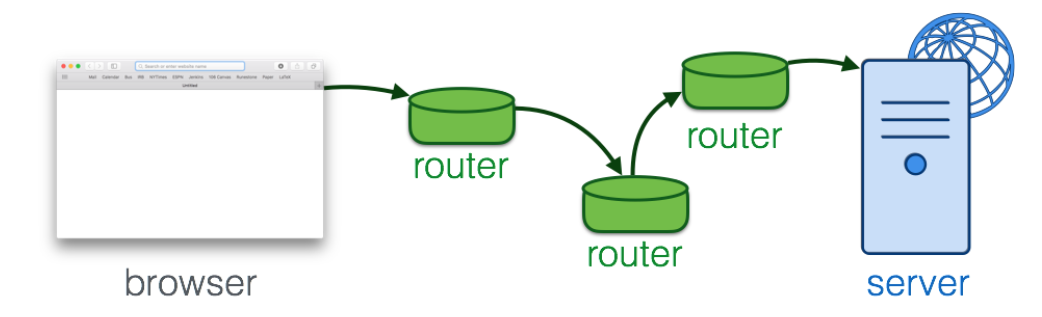

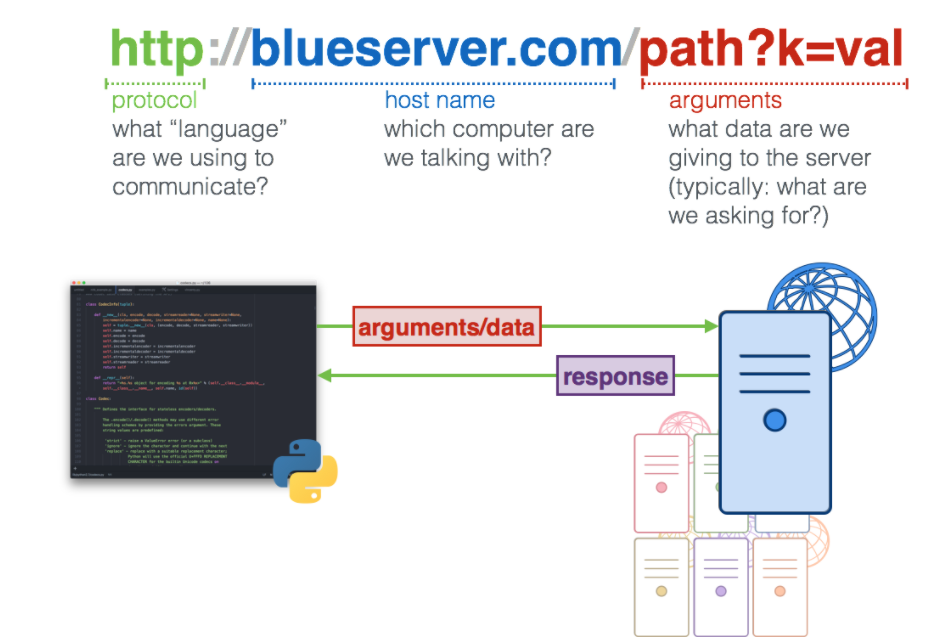

### The HTTP protocol

A protocol specifies the order in which parties will speak and the format of what they say and the content of appropriate responses.

HTTP is the protocol that specifies how web browsers or other programs communicate with web servers. One version of the formal specification, before it was later split into multiple documents, was IETF RFC 2616. It is 176 pages long! Fortunately, the basics are pretty easy to understand.

Step 1: the client makes a request to the server.
If the request only involves fetching data, the client sends a message of the form GET <path>, where <path> is the path part of the URL

If the request involves sending some data (e.g., a file upload, or some authentication information), the message starts with POST

In either case, the client sends some HTTP headers. These include:
The type of client program. This allows the server to send back different things to small mobile devices than desktop browsers (a “responsive” website)

Any cookies that the server previously asked the client to hold onto. This allows the server to continue previous interactions, rather than treating every request as stand-alone. It also allows ad networks to place personalized ads.

After the HTTP headers, for a POST type communication, there is some data (the body of the request).
    
Step 2: the server responds to the client.
The server first sends back some HTTP headers. These include:
a response code indicating whether the server thinks it has fulfilled the request or not.

a description of the type of content it is sending back (e.g., text/html when it is sending html-formatted text).

any cookies it would like the client to hold onto and send back the next time it communicates with the server.

After the headers come the contents. This is the stuff that you would see if you ask to “View Source” in a browser.

### Using REST APIs

REST stands for REpresentational State Transfer. It originally had a more abstract meaning, but has come to be a shorthand name for web sites that act a bit like python functions, taking as inputs values for certain parameters and producing outputs in the form of a long text string.

API stands for Application Programming Interface. An API specifies how an external program (an application program) can request that a program perform certain computations.

Putting the two together, a REST API specifies how external programs can make HTTP requests to a web site in order to request that some computation be carried out and data returned as output. When a website is designed to accept requests generated by other computer programs, and produce outputs to be consumed by other programs, it is sometimes called a web service, as opposed to a web site which produces output meant for humans to consume in a web browser.

In this format, the URL has a standard structure:

- the base URL

- a ? character

- one or more key-value pairs, formatted as key=value pairs and separated by the & character.

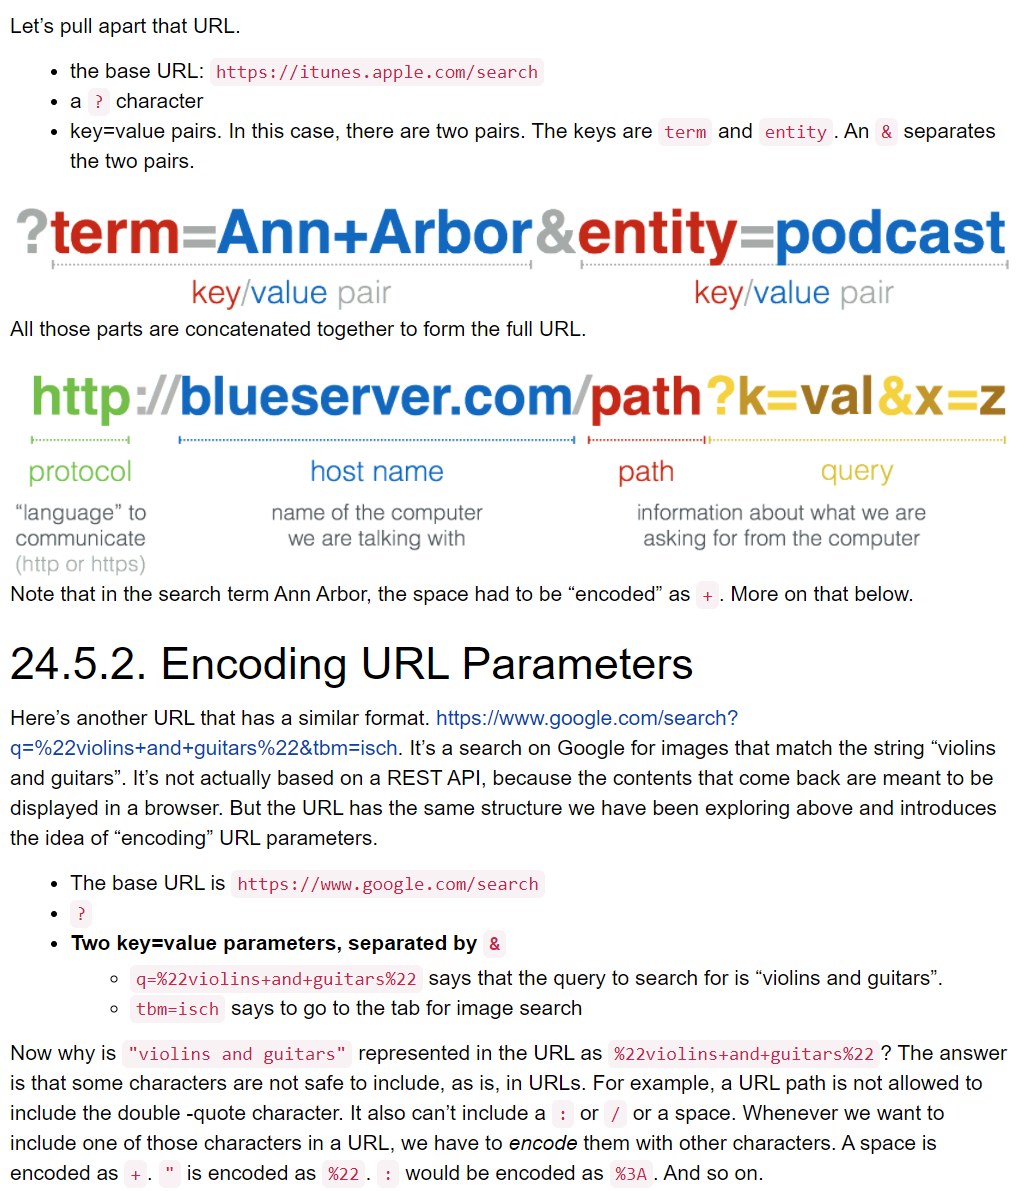

### Fetching in python with requests.get

In [33]:
import requests
import json

page = requests.get("https://api.datamuse.com/words?rel_rhy=funny")
print(type(page))
print(page.text[:150]) # print the first 150 characters
print(page.url) # print the url that was fetched
print("------")
x = page.json() # turn page.text into a python object
print(type(x))
print("---first item in the list---")
print(x[0])
print("---the whole list, pretty printed---")
print(json.dumps(x, indent=2)) # pretty print the results

<class 'requests.models.Response'>
[{"word":"money","score":4415,"numSyllables":2},{"word":"honey","score":1206,"numSyllables":2},{"word":"sunny","score":717,"numSyllables":2},{"word":"
https://api.datamuse.com/words?rel_rhy=funny
------
<class 'list'>
---first item in the list---
{'word': 'money', 'score': 4415, 'numSyllables': 2}
---the whole list, pretty printed---
[
  {
    "word": "money",
    "score": 4415,
    "numSyllables": 2
  },
  {
    "word": "honey",
    "score": 1206,
    "numSyllables": 2
  },
  {
    "word": "sunny",
    "score": 717,
    "numSyllables": 2
  },
  {
    "word": "bunny",
    "score": 702,
    "numSyllables": 2
  },
  {
    "word": "blini",
    "score": 613,
    "numSyllables": 2
  },
  {
    "word": "gunny",
    "score": 449,
    "numSyllables": 2
  },
  {
    "word": "tunny",
    "score": 301,
    "numSyllables": 2
  },
  {
    "word": "sonny",
    "score": 286,
    "numSyllables": 2
  },
  {
    "word": "dunny",
    "score": 245,
    "numSyllables": 2


In [34]:
d = {'q': '"violins and guitars"', 'tbm': 'isch'}
results = requests.get("https://google.com/search", params=d)
print(results.url)

https://www.google.com/search?q=%22violins+and+guitars%22&tbm=isch


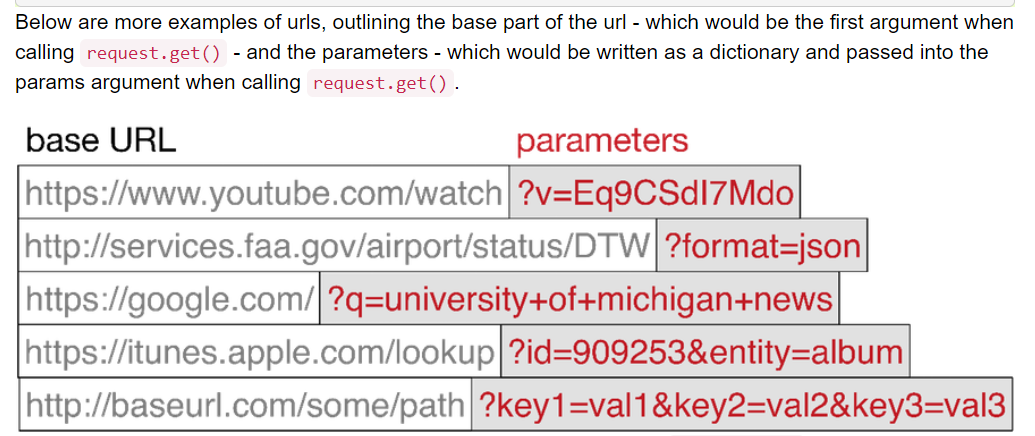

### How to use a REST API

### Caching Response Content

In [38]:
import requests
import json

PERMANENT_CACHE_FNAME = "permanent_cache.txt"
TEMP_CACHE_FNAME = "this_page_cache.txt"

def _write_to_file(cache, fname):
    with open(fname, 'w') as outfile:
        outfile.write(json.dumps(cache, indent=2))

def _read_from_file(fname):
    try:
        with open(fname, 'r') as infile:
            res = infile.read()
            return json.loads(res)
    except:
        return {}

def add_to_cache(cache_file, cache_key, cache_value):
    temp_cache = _read_from_file(cache_file)
    temp_cache[cache_key] = cache_value
    _write_to_file(temp_cache, cache_file)

def clear_cache(cache_file=TEMP_CACHE_FNAME):
    _write_to_file({}, cache_file)

def make_cache_key(baseurl, params_d, private_keys=["api_key"]):
    """Makes a long string representing the query.
    Alphabetize the keys from the params dictionary so we get the same order each time.
    Omit keys with private info."""
    alphabetized_keys = sorted(params_d.keys())
    res = []
    for k in alphabetized_keys:
        if k not in private_keys:
            res.append("{}-{}".format(k, params_d[k]))
    return baseurl + "_".join(res)

def get(baseurl, params={}, private_keys_to_ignore=["api_key"], permanent_cache_file=PERMANENT_CACHE_FNAME, temp_cache_file=TEMP_CACHE_FNAME):
    full_url = requests.requestURL(baseurl, params)
    cache_key = make_cache_key(baseurl, params, private_keys_to_ignore)
    # Load the permanent and page-specific caches from files
    permanent_cache = _read_from_file(permanent_cache_file)
    temp_cache = _read_from_file(temp_cache_file)
    if cache_key in temp_cache:
        print("found in temp_cache")
        # make a Response object containing text from the change, and the full_url that would have been fetched
        return requests.Response(temp_cache[cache_key], full_url)
    elif cache_key in permanent_cache:
        print("found in permanent_cache")
        # make a Response object containing text from the change, and the full_url that would have been fetched
        return requests.Response(permanent_cache[cache_key], full_url)
    else:
        print("new; adding to cache")
        # actually request it
        resp = requests.get(baseurl, params)
        # save it
        add_to_cache(temp_cache_file, cache_key, resp.text)
        return resp

### Google Places API

In [ ]:
import requests
# You need to install the requests module to use this code
import json

api_key = False
# If you have a Google Places API key, enter it here
# api_key = 'AIzaSy___IDByT70'
# https://developers.google.com/maps/documentation/geocoding/intro

if api_key is False:
    api_key = 42
    serviceurl = 'http://py4e-data.dr-chuck.net/json'
else :
    serviceurl = 'https://maps.googleapis.com/maps/api/geocode/json'

while True:
    address = input('Enter location: ')
    if len(address) < 1: break

    payload = dict()
    payload['address'] = address
    if api_key is not False: payload['key'] = api_key

    r = requests.get(serviceurl, params=payload)
    print('Retrieved', r.url)
    data = r.text
    print('Retrieved', len(data), 'characters')

    try:
        js = json.loads(data)
    except:
        js = None

    if not js or 'status' not in js or js['status'] != 'OK':
        print('==== Failure To Retrieve ====')
        print(data)
        continue

    print(json.dumps(js, indent=4))

    lat = js['results'][0]['geometry']['location']['lat']
    lng = js['results'][0]['geometry']['location']['lng']
    print('lat', lat, 'lng', lng)
    location = js['results'][0]['formatted_address']
    print(location)

Enter location:  51 Homer St, Moonee Ponds VIC


Retrieved http://py4e-data.dr-chuck.net/json?address=51+Homer+St%2C+Moonee+Ponds+VIC&key=42
Retrieved 2100 characters
{
    "results": [
        {
            "address_components": [
                {
                    "long_name": "51",
                    "short_name": "51",
                    "types": [
                        "street_number"
                    ]
                },
                {
                    "long_name": "Homer Street",
                    "short_name": "Homer St",
                    "types": [
                        "route"
                    ]
                },
                {
                    "long_name": "Moonee Ponds",
                    "short_name": "Moonee Ponds",
                    "types": [
                        "locality",
                        "political"
                    ]
                },
                {
                    "long_name": "City of Moonee Valley",
                    "short_name": "City of Moonee Vall